In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [94]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [95]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [96]:
# Save references to each table
measure = Base.classes.measurement
station = Base.classes.station

In [97]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
last_date = session.query(measure.date).order_by(measure.date.desc()).first()
last_date = last_date[0]
last_date

'2017-08-23'

In [91]:
# Calculate the date one year from the last date in data set
start_date = dt.datetime.strptime(last_date, "%Y-%m-%d") - dt.timedelta(days=365)
print(start_date.date())

2016-08-23


In [113]:
# Perform a query to retrieve the date and precipitation scores
result = session.query(measure.date,measure.prcp).filter(measure.date >= start_date).all()

In [87]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(result, columns=['Date', 'Precipitation'])
prcp_df.set_index('Date', inplace=True)

# Sort the dataframe by date
prcp_df.sort_values(by=['Date'], inplace=True)
prcp_df.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


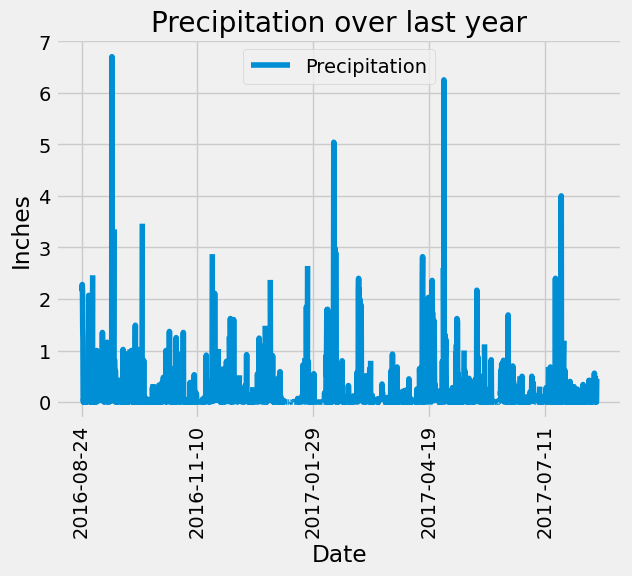

In [88]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()
plt.tight_layout()
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title('Precipitation over last year')
plt.xticks(rotation = 90)
plt.show()

In [86]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
total = session.query(station.id).count()
print(total)

9


In [51]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_list = session.query(measure.station,func.count(measure.station)).\
                group_by(measure.station).order_by(func.count(measure.station).desc()).all()
for row in active_list:
        print(row)           

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [57]:
# Get most active station.
most_active = session.query(measure.station).group_by(measure.station).\
                    order_by(func.count(measure.station).desc()).first()
most_active = most_active[0]
print(most_active)

USC00519281


In [61]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [measure.station, func.min(measure.tobs), 
       func.max(measure.tobs), func.avg(measure.tobs)]
active_station = session.query(*sel).filter(measure.station == most_active).\
                    group_by(measure.station)

for row in active_station:
    print(row)

('USC00519281', 54.0, 85.0, 71.66378066378067)


In [107]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#--we'll be using the same 12-month period used in he previous section
active_result = session.query(measure.tobs).\
                filter(measure.station == most_active).\
                filter(measure.date >= start_date, measure.date <= last_date)
temp_list = []
for row in active_result:
    temp_list.append(row[0])


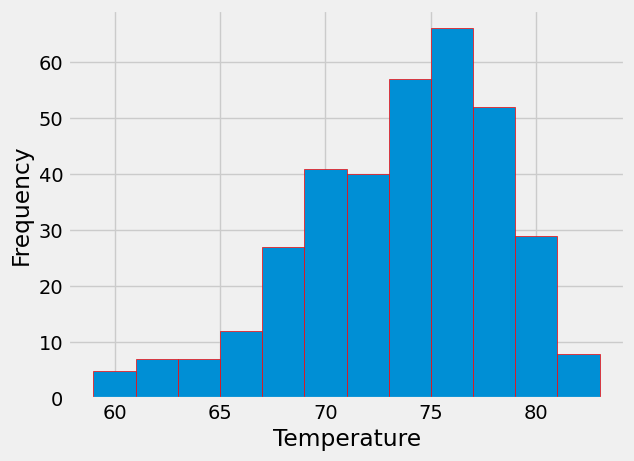

In [106]:
plt.hist(temp_list, edgecolor="red", bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [108]:
# Close Session
session.close()